In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("insurance_claim_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


EDA PROCESS

In [3]:
df.drop(["_c39","policy_number","umbrella_limit"],axis=1,inplace=True)

In [4]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

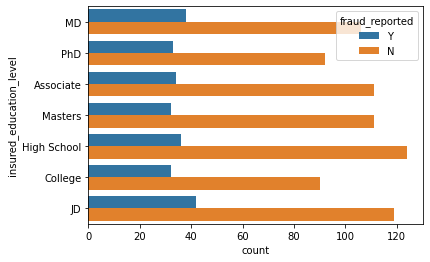

In [5]:
sns.countplot(y='insured_education_level', hue='fraud_reported', data = df)

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

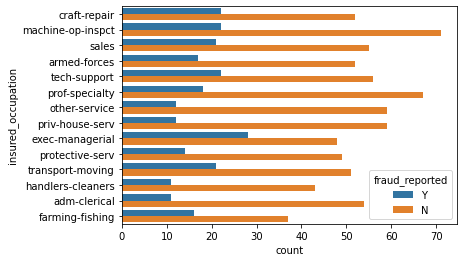

In [6]:
sns.countplot(y='insured_occupation', hue='fraud_reported', data = df)

<AxesSubplot:xlabel='count', ylabel='insured_sex'>

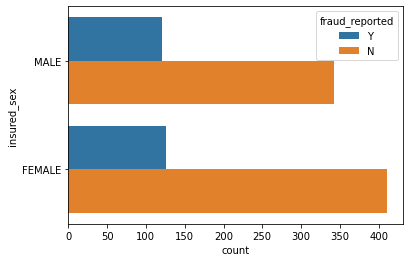

In [8]:
sns.countplot(y='insured_sex', hue='fraud_reported', data = df)

<AxesSubplot:xlabel='count', ylabel='insured_relationship'>

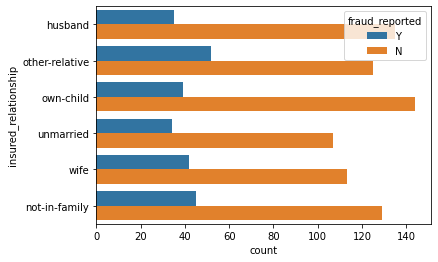

In [9]:
sns.countplot(y='insured_relationship', hue='fraud_reported', data = df)

<AxesSubplot:xlabel='count', ylabel='incident_type'>

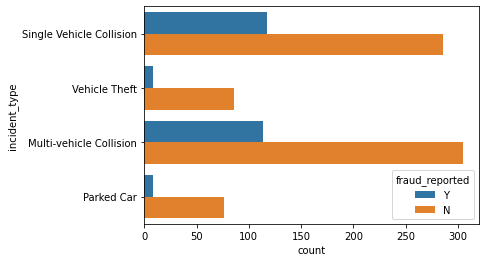

In [11]:
sns.countplot(y='incident_type', hue='fraud_reported', data = df)

<AxesSubplot:xlabel='count', ylabel='incident_severity'>

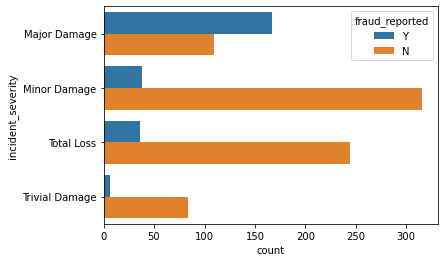

In [5]:
sns.countplot(y='incident_severity', hue='fraud_reported', data = df)

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

LABEL ENCODER

In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['policy_state','policy_csl','insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location','property_damage','police_report_available','auto_make',
       'auto_model','fraud_reported']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,2,1,1000,1406.91,466132,1,4,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,27-06-2006,1,1,2000,1197.22,468176,1,4,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,06-09-2000,2,0,2000,1413.14,430632,0,6,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,25-05-1990,0,1,2000,1415.74,608117,0,6,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,06-06-2014,0,2,1000,1583.91,610706,1,0,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,2,2,1000,1310.80,431289,0,5,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,05-01-2014,0,0,1000,1436.79,608177,0,6,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,17-02-2003,2,1,500,1383.49,442797,0,5,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,18-11-2011,0,2,2000,1356.92,441714,1,0,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [15]:
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])
df["incident_date"]=pd.to_datetime(df["incident_date"])

In [16]:
df['p_month']=df['policy_bind_date'].dt.month
df["p_date"]=df["policy_bind_date"].dt.day
df["p_year"]=df["policy_bind_date"].dt.year
df.drop("policy_bind_date",axis=1,inplace=True)

In [17]:
df['i_month']=df['incident_date'].dt.month
df["i_date"]=df["incident_date"].dt.day
df.drop("incident_date",axis=1,inplace=True)

In [18]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,p_month,p_date,p_year,i_month,i_date
0,328,48,2,1,1000,1406.91,466132,1,4,2,...,52080,10,1,2004,1,10,17,2014,1,25
1,228,42,1,1,2000,1197.22,468176,1,4,6,...,3510,8,12,2007,1,6,27,2006,1,21
2,134,29,2,0,2000,1413.14,430632,0,6,11,...,23100,4,30,2007,0,6,9,2000,2,22
3,256,41,0,1,2000,1415.74,608117,0,6,1,...,50720,3,34,2014,1,5,25,1990,10,1
4,228,44,0,2,1000,1583.91,610706,1,0,11,...,4550,0,31,2009,0,6,6,2014,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,431289,0,5,2,...,61040,6,6,2006,0,7,16,1991,2,22
996,285,41,0,0,1000,1436.79,608177,0,6,9,...,72320,13,28,2015,0,5,1,2014,1,24
997,130,34,2,1,500,1383.49,442797,0,5,1,...,52500,11,19,1996,0,2,17,2003,1,23
998,458,62,0,2,2000,1356.92,441714,1,0,5,...,36540,1,5,1998,0,11,18,2011,2,26


In [19]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

<AxesSubplot:xlabel='count', ylabel='age'>

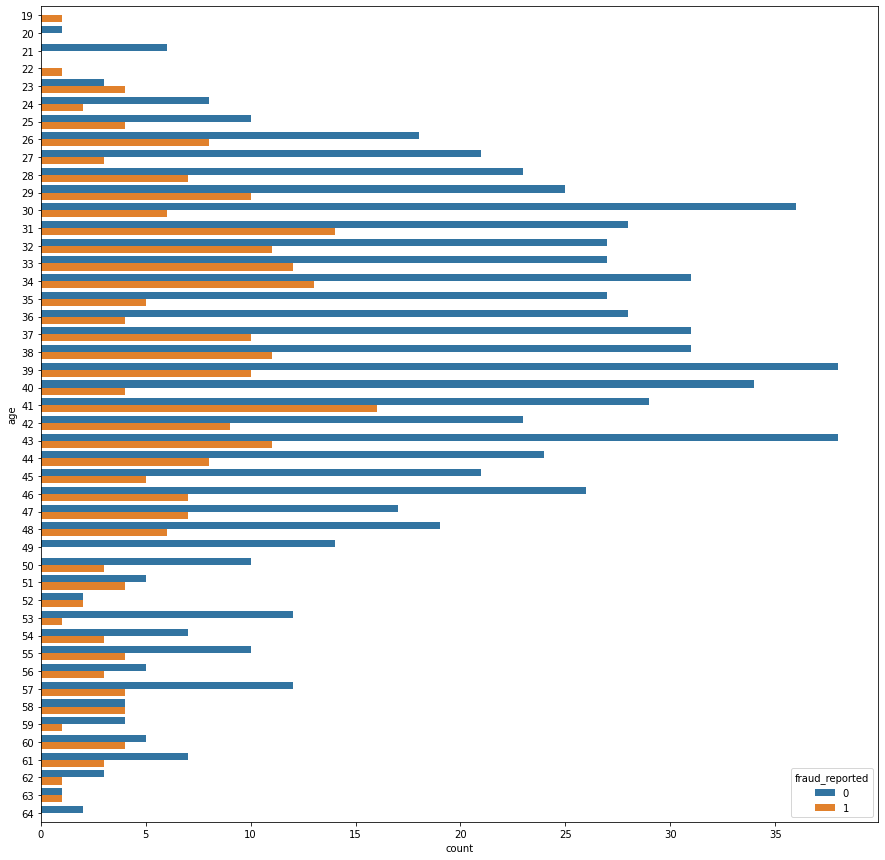

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(y='age', hue='fraud_reported', data = df)

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_state'}>,
        <AxesSubplot:title={'center':'policy_csl'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'insured_sex'}>],
       [<AxesSubplot:title={'center':'insured_education_level'}>,
        <AxesSubplot:title={'center':'insured_occupation'}>,
        <AxesSubplot:title={'center':'insured_hobbies'}>,
        <AxesSubplot:title={'center':'insured_relationship'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_type'}>,
        <AxesSubplot:title={'center':'collision_type'}>],
       [<AxesSubplot:title={'center':'incident_severity'}>,
        <AxesSubplo

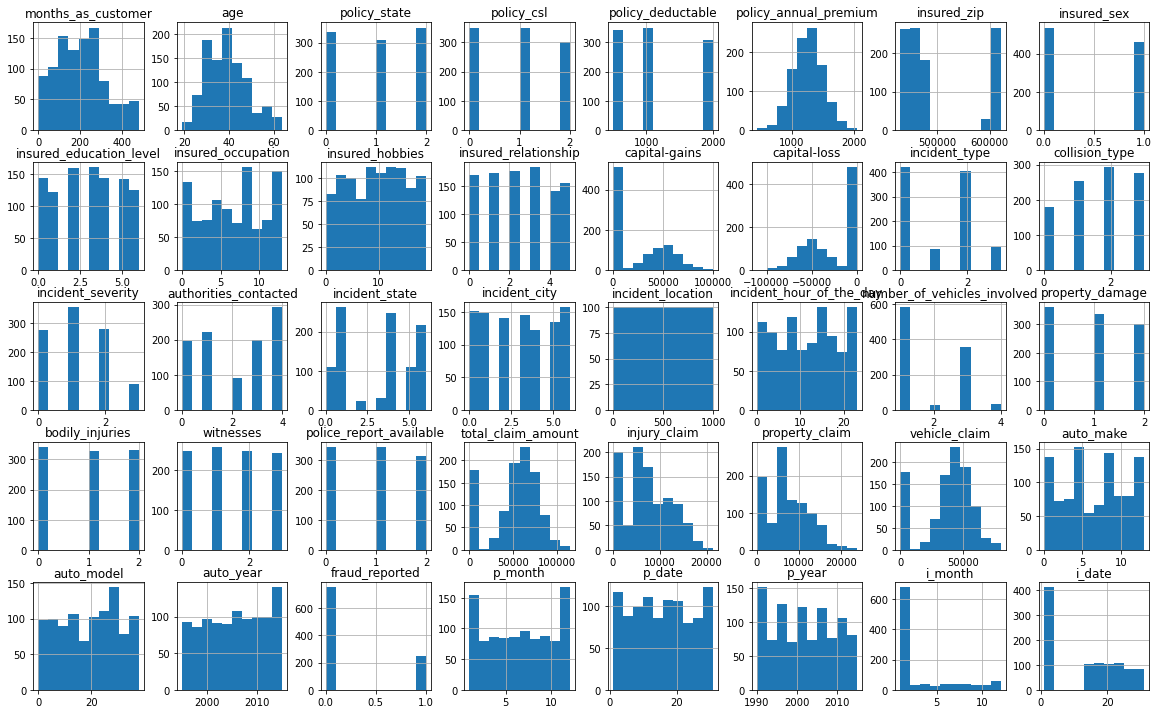

In [21]:
df.hist(figsize=(20,20),grid=True,layout=(8,8))

In [22]:
dfd=df.describe()

In [23]:
dfd.iloc[:,:16]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.666000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,1.063755
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,1.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,2.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,3.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000


In [24]:
dfd.iloc[:,16:31]

,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000
std,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [25]:
dfd.iloc[:,31:]

,auto_make,auto_model,auto_year,fraud_reported,p_month,p_date,p_year,i_month,i_date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,6.546000,19.318000,2005.103000,0.247000,6.559000,15.448000,2001.604000,3.407000,13.08400
std,4.034869,11.136107,6.015861,0.431483,3.391758,8.850176,7.360391,3.276291,10.44318
min,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.00000
25%,3.000000,10.000000,2000.000000,0.000000,4.000000,8.000000,1995.000000,1.000000,2.00000
50%,7.000000,20.000000,2005.000000,0.000000,7.000000,16.000000,2002.000000,2.000000,15.00000
75%,10.000000,29.000000,2010.000000,0.000000,9.000000,23.000000,2008.000000,5.000000,22.00000
max,13.000000,38.000000,2015.000000,1.000000,12.000000,31.000000,2015.000000,12.000000,31.00000


In [26]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777


months_as_customer               AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
age                            AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
policy_state                   AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
policy_csl                     AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
policy_deductable              AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
policy_annual_premium          AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
insured_zip                    AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
insured_sex                    AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
insured_education_level          AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
insured_occupation             AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
insured_hobbies                AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
insured_relationship           AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
capital-gains               

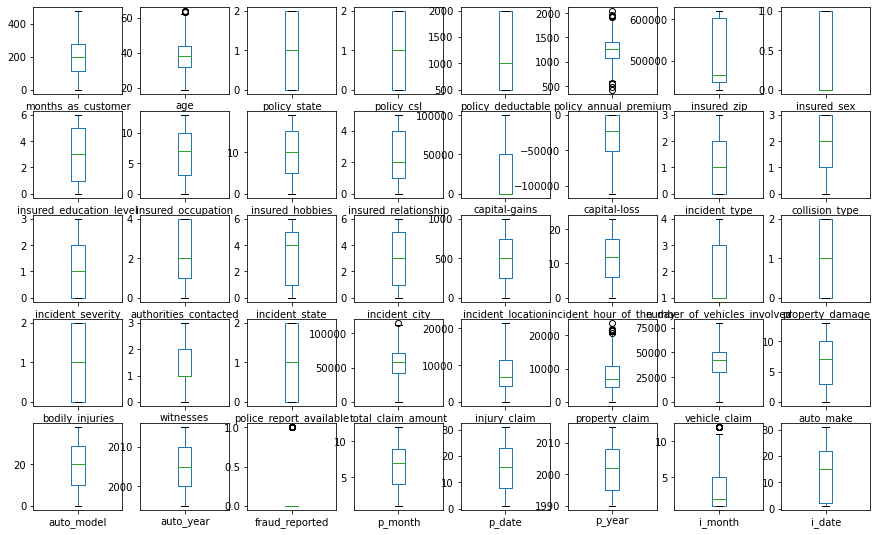

In [27]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 1.18717314, ..., 1.68499231, 0.73503976,
        1.14160272],
       [0.2089946 , 0.33407345, 0.01685641, ..., 0.59754971, 0.73503976,
        0.75838596],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.21803224, 0.42966387,
        0.85419015],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 0.18975873, 0.73503976,
        0.94999434],
       [2.20802805, 2.52328351, 1.22088596, ..., 1.27720133, 0.42966387,
        1.23740691],
       [2.19064515, 2.3043625 , 1.18717314, ..., 0.76175354, 0.42966387,
        1.23740691]])

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,p_month,p_date,p_year,i_month,i_date
0,328,48,2,1,1000,1406.91,466132,1,4,2,...,52080,10,1,2004,1,10,17,2014,1,25
1,228,42,1,1,2000,1197.22,468176,1,4,6,...,3510,8,12,2007,1,6,27,2006,1,21
2,134,29,2,0,2000,1413.14,430632,0,6,11,...,23100,4,30,2007,0,6,9,2000,2,22
3,256,41,0,1,2000,1415.74,608117,0,6,1,...,50720,3,34,2014,1,5,25,1990,10,1
4,228,44,0,2,1000,1583.91,610706,1,0,11,...,4550,0,31,2009,0,6,6,2014,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,431289,0,5,2,...,61040,6,6,2006,0,7,16,1991,2,22
996,285,41,0,0,1000,1436.79,608177,0,6,9,...,72320,13,28,2015,0,5,1,2014,1,24
997,130,34,2,1,500,1383.49,442797,0,5,1,...,52500,11,19,1996,0,2,17,2003,1,23
998,458,62,0,2,2000,1356.92,441714,1,0,5,...,36540,1,5,1998,0,11,18,2011,2,26


In [30]:
df.shape

(1000, 40)

In [31]:
995/1000

0.995

In [32]:
df_new.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.824182
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.193075
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_location              0.000429
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.099513
bodily_injuries                0.012979


In [33]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'p_month', 'p_date',
       'p_year', 'i_month', 'i_date'],
      dtype='object')

BY USING BOXCOX METHOD

In [34]:
values=["insured_zip","total_claim_amount","i_month"]
from scipy.stats import boxcox
for i in values:
    df_new[i]=boxcox(df_new[i],0)
df_new.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.789821
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.193075
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_location              0.000429
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.099513
bodily_injuries                0.012979


CORRELATION GRAPH

In [35]:
df_new.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,p_month,p_date,p_year,i_month,i_date
months_as_customer,1.000000,0.922092,0.000115,-0.022954,0.023763,-0.003318,0.023935,0.058878,-0.000845,0.005500,...,0.062170,0.049048,0.002689,0.001017,0.020878,0.004976,0.054460,-0.045888,0.020680,-0.013681
age,0.922092,1.000000,-0.015184,-0.012423,0.026951,0.005931,0.030237,0.072832,0.001487,0.014124,...,0.062025,0.031987,0.016125,0.003092,0.012348,0.015888,0.054675,-0.035425,0.018597,-0.008294
policy_state,0.000115,-0.015184,1.000000,-0.000347,0.010776,0.014483,0.008391,-0.019320,-0.032551,-0.031011,...,-0.000549,0.015838,-0.024562,0.002296,0.028858,0.071530,0.001057,-0.005695,0.026502,0.013359
policy_csl,-0.022954,-0.012423,-0.000347,1.000000,0.006065,0.030842,0.002845,-0.008313,0.010379,0.019551,...,-0.048461,-0.006483,0.048485,-0.034835,-0.038765,-0.044661,0.016457,-0.017727,-0.033643,-0.003813
policy_deductable,0.023763,0.026951,0.010776,0.006065,1.000000,-0.008983,0.008154,-0.010368,0.014560,-0.051268,...,0.005452,-0.032381,-0.001652,0.029947,0.016663,-0.051602,0.009208,-0.049767,-0.002196,-0.017387
policy_annual_premium,-0.003318,0.005931,0.014483,0.030842,-0.008983,1.000000,0.048848,0.042200,-0.021483,0.030664,...,0.012977,0.012124,-0.034517,-0.039869,-0.009961,-0.028503,-0.031454,0.001324,-0.004788,0.016811
insured_zip,0.023935,0.030237,0.008391,0.002845,0.008154,0.048848,1.000000,-0.038196,0.016434,-0.066302,...,-0.038986,-0.027137,0.024025,-0.038383,0.020215,0.014665,-0.039086,-0.000997,-0.000080,0.019251
insured_sex,0.058878,0.072832,-0.019320,-0.008313,-0.010368,0.042200,-0.038196,1.000000,0.007493,-0.008487,...,-0.025235,0.024789,-0.018991,-0.030264,0.031656,-0.007142,0.047092,-0.031192,0.024622,-0.008253
insured_education_level,-0.000845,0.001487,-0.032551,0.010379,0.014560,-0.021483,0.016434,0.007493,1.000000,-0.021525,...,0.070112,0.057608,0.050951,0.045188,0.011532,-0.007491,0.014453,0.017792,0.073230,-0.055423
insured_occupation,0.005500,0.014124,-0.031011,0.019551,-0.051268,0.030664,-0.066302,-0.008487,-0.021525,1.000000,...,0.000479,0.045528,0.022054,-0.003433,0.003815,0.024417,-0.004222,-0.026027,0.015802,-0.021918


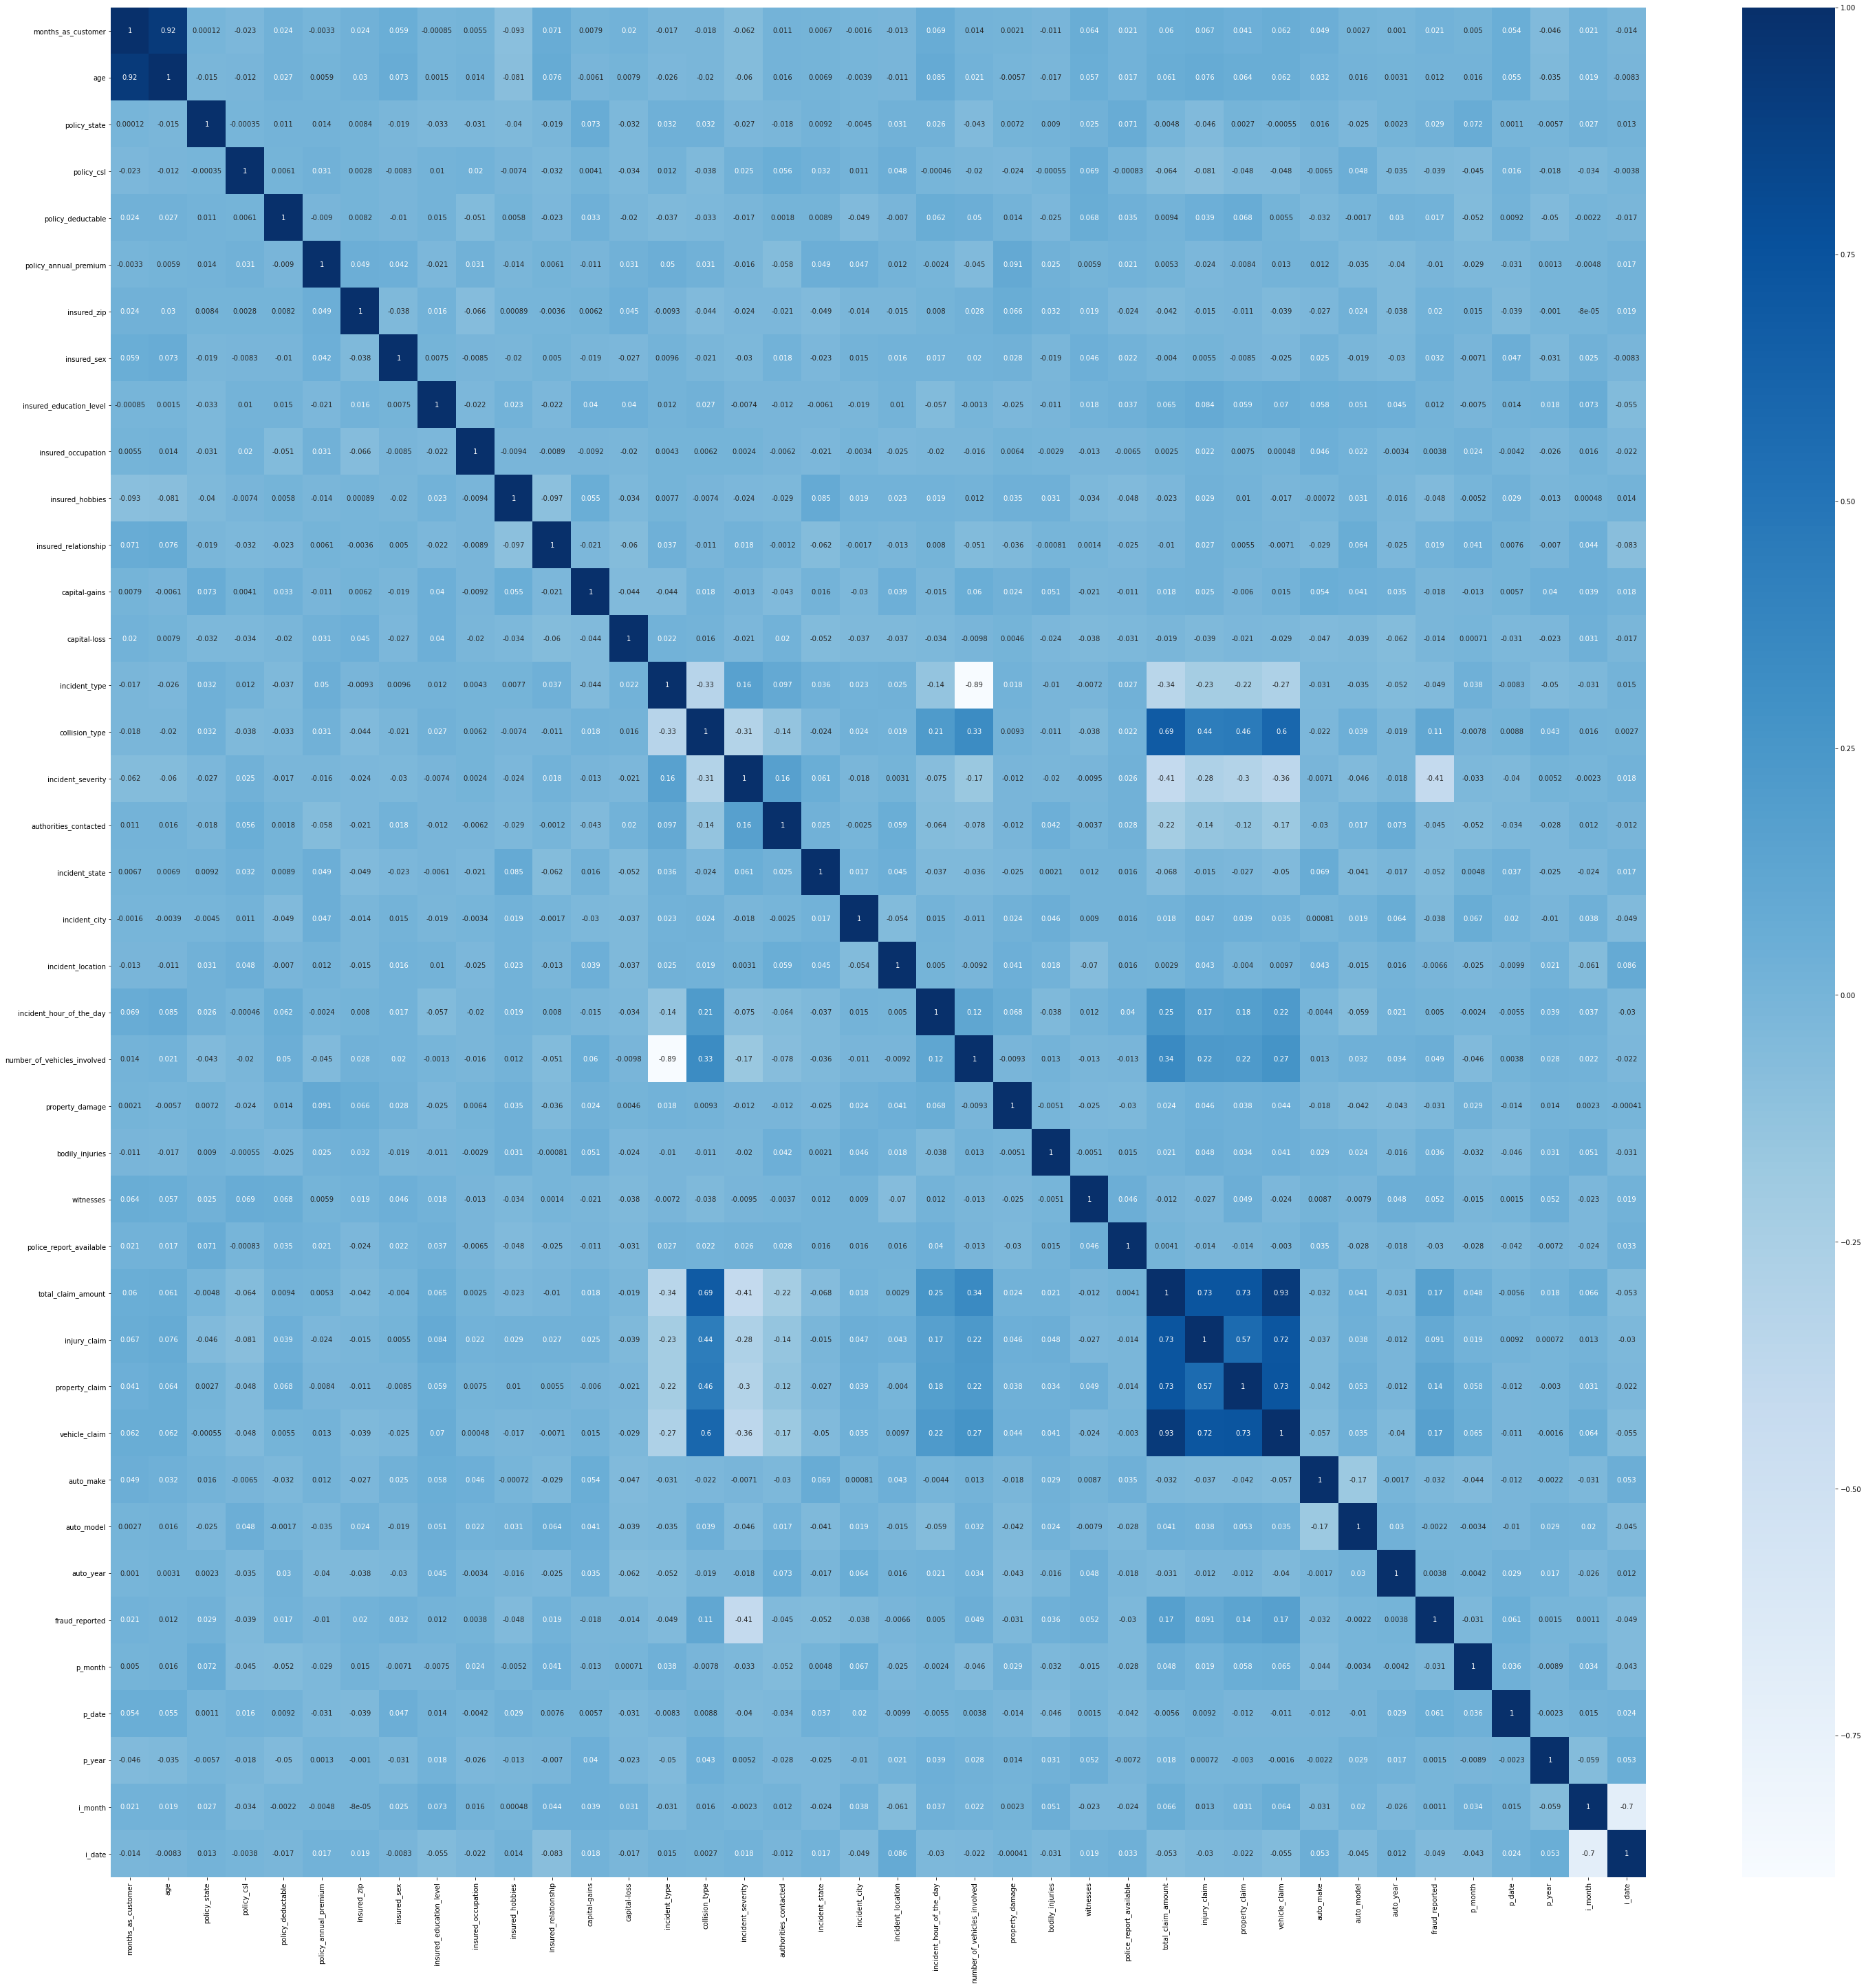

In [36]:
plt.figure(figsize=(50,50))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'fraud_reported']
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,p_month,p_date,p_year,i_month,i_date
0,328,48,2,1,1000,1406.91,13.052224,1,4,2,...,13020,52080,10,1,2004,10,17,2014,0.000000,25
1,228,42,1,1,2000,1197.22,13.056600,1,4,6,...,780,3510,8,12,2007,6,27,2006,0.000000,21
2,134,29,2,0,2000,1413.14,12.973009,0,6,11,...,3850,23100,4,30,2007,6,9,2000,0.693147,22
3,256,41,0,1,2000,1415.74,13.318123,0,6,1,...,6340,50720,3,34,2014,5,25,1990,2.302585,1
4,228,44,0,2,1000,1583.91,13.322371,1,0,11,...,650,4550,0,31,2009,6,6,2014,0.693147,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,12.974534,0,5,2,...,8720,61040,6,6,2006,7,16,1991,0.693147,22
996,285,41,0,0,1000,1436.79,13.318221,0,6,9,...,18080,72320,13,28,2015,5,1,2014,0.000000,24
997,130,34,2,1,500,1383.49,13.000867,0,5,1,...,7500,52500,11,19,1996,2,17,2003,0.000000,23
998,458,62,0,2,2000,1356.92,12.998418,1,0,5,...,5220,36540,1,5,1998,11,18,2011,0.693147,26


In [32]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [33]:
calc_vif(x)

,variable,VIF factor
0,months_as_customer,28.491639
1,age,131.643681
2,policy_state,2.591699
3,policy_csl,2.470573
4,policy_deductable,4.647173
5,policy_annual_premium,29.547425
6,insured_zip,9042.158397
7,insured_sex,1.924226
8,insured_education_level,3.448837
9,insured_occupation,3.829385


In [35]:
df_new["fraud_reported"].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

SMOTE PROCESS -as our target column is imbalanced

In [36]:
dfx=df_new.iloc[:,df_new.columns != 'fraud_reported']
dfx

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,p_month,p_date,p_year,i_month,i_date
0,328,48,2,1,1000,1406.91,13.052224,1,4,2,...,13020,52080,10,1,2004,10,17,2014,0.000000,25
1,228,42,1,1,2000,1197.22,13.056600,1,4,6,...,780,3510,8,12,2007,6,27,2006,0.000000,21
2,134,29,2,0,2000,1413.14,12.973009,0,6,11,...,3850,23100,4,30,2007,6,9,2000,0.693147,22
3,256,41,0,1,2000,1415.74,13.318123,0,6,1,...,6340,50720,3,34,2014,5,25,1990,2.302585,1
4,228,44,0,2,1000,1583.91,13.322371,1,0,11,...,650,4550,0,31,2009,6,6,2014,0.693147,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,12.974534,0,5,2,...,8720,61040,6,6,2006,7,16,1991,0.693147,22
996,285,41,0,0,1000,1436.79,13.318221,0,6,9,...,18080,72320,13,28,2015,5,1,2014,0.000000,24
997,130,34,2,1,500,1383.49,13.000867,0,5,1,...,7500,52500,11,19,1996,2,17,2003,0.000000,23
998,458,62,0,2,2000,1356.92,12.998418,1,0,5,...,5220,36540,1,5,1998,11,18,2011,0.693147,26


In [40]:
dfy=df_new.iloc[:,34]
dfy

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 995, dtype: int32

In [41]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [42]:
trainy.value_counts()

1    749
0    749
Name: fraud_reported, dtype: int64

STANDARD SCALER

In [43]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [44]:
trainx

array([[ 1.10157546,  1.03728079,  1.37068648, ...,  1.84097052,
        -1.07184076,  1.27025742],
       [ 0.20029192,  0.35938653,  0.11177272, ...,  0.68285027,
        -1.07184076,  0.86578391],
       [-0.64691461, -1.10938437,  1.37068648, ..., -0.18573991,
        -0.21602784,  0.96690229],
       ...,
       [-0.8722355 , -0.77043724,  0.11177272, ..., -0.62003501,
         1.49559799, -1.15658362],
       [ 2.12002586,  2.39306932,  0.11177272, ...,  0.68285027,
         1.42489782, -1.15658362],
       [-0.12417016, -0.31850773,  0.11177272, ...,  0.8276153 ,
        -0.32814581, -0.65099174]])

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [45]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8577777777777778 on random state 142


In [46]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=142)

In [47]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.7888888888888889
training score= 0.8148854961832062
[[171  54]
 [ 41 184]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       225
           1       0.77      0.82      0.79       225

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450
 

testing score= 0.8644444444444445
training score= 1.0
[[184  33]
 [ 28 205]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       217
           1       0.86      0.88      0.87       233

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450
 

testing score= 0.8577777777777778
training score= 0.958969465648855
[[191  43]
 [ 21 195]]
              precision    recall  f1-score   support

           0       0.90    

CROSS VALIDATION PROCESS

In [48]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,trainx,trainy,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.64       0.65333333 0.62666667 0.83333333 0.83333333 0.82
 0.84       0.86       0.89932886 0.87248322]
mean_score= 0.787847874720358
std= 0.09930814464459134 

score= [0.70666667 0.71333333 0.74666667 0.84666667 0.86       0.79333333
 0.84666667 0.90666667 0.87919463 0.87248322]
mean_score= 0.8171677852348994
std= 0.06857311637979553 

score= [0.64       0.68       0.64       0.88666667 0.91333333 0.93333333
 0.91333333 0.96       0.95973154 0.94630872]
mean_score= 0.8472706935123042
std= 0.12913287812057073 

score= [0.70666667 0.75333333 0.76666667 0.9        0.92       0.88
 0.92       0.95333333 0.95302013 0.91946309]
mean_score= 0.8672483221476511
std= 0.08554199757340337 

score= [0.64       0.64666667 0.62       0.69333333 0.67333333 0.68666667
 0.73333333 0.68666667 0.69798658 0.73154362]
mean_score= 0.6809530201342282
std= 0.035267330978198244 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameter={"max_depth": np.arange(2,10),
          "criterion": ["gini","entropy"],
          "max_leaf_nodes": np.arange(2,10),
          "max_features": ["auto","sqrt","log2"]}

In [51]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [52]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [53]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 9}

In [54]:
final_model=RandomForestClassifier(criterion='gini',max_depth=7,max_features='log2',max_leaf_nodes=9)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.8111111111111111


AUC-ROC CURVE

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.79284925, 0.34001937, 0.54631031, 0.78515687, 0.60420713,
       0.34182193, 0.53353393, 0.15720162, 0.75576283, 0.28715108,
       0.70353593, 0.38188648, 0.17637121, 0.70814734, 0.3022232 ,
       0.65989258, 0.30644955, 0.25447517, 0.72224099, 0.245697  ,
       0.21508324, 0.26270671, 0.21966948, 0.77510579, 0.74003471,
       0.53213376, 0.80428551, 0.47125386, 0.28202747, 0.27771194,
       0.37984769, 0.80748369, 0.26731616, 0.83053623, 0.31996519,
       0.3003335 , 0.38236855, 0.28305766, 0.58000896, 0.45382097,
       0.83204097, 0.23083554, 0.23992099, 0.28989178, 0.59086986,
       0.81741208, 0.791268  , 0.30662905, 0.58767794, 0.34993934,
       0.35717118, 0.33568269, 0.24212821, 0.51315846, 0.27128808,
       0.81508625, 0.36094984, 0.42612155, 0.67855695, 0.78052346,
       0.77731816, 0.76143716, 0.75206253, 0.78748835, 0.25542686,
       0.26784191, 0.55257258, 0.82197702, 0.60842511, 0.28905609,
       0.74608613, 0.47595394, 0.47465232, 0.80352024, 0.66311

In [57]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

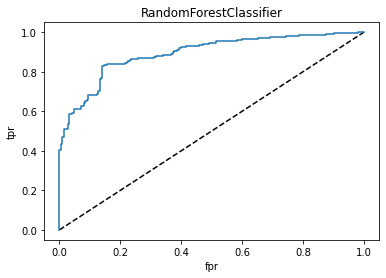

In [68]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RFC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()

In [69]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
auc_score

0.813699064531473

SAVING THE BEST MODEL

In [70]:
import joblib

joblib.dump(final_model,"insurance_claim_fraud.obj")

['insurance_claim_fraud.obj']

In [71]:
insurance_claim_fraud_from_joblib=joblib.load("insurance_claim_fraud.obj")
insurance_claim_fraud_from_joblib.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,